In [1]:
import numpy as np
from numpy.random import Generator, SFC64
import matplotlib.pyplot as plt


In [2]:
from datetime import datetime
from examples.time_series_stats.hypothetical_time_series import SimulateData


rng = Generator(SFC64(123453))
unix_times, tokens = SimulateData.generate_sine_wave_with_noise(
    start=datetime(2020, 1, 1),
    end=datetime(2020, 1, 2),
    n=100,
    amplitude=10.0,
    shift=15.0,
    noise_std=0.1,
    rng=rng,
    period_ms=(17 * 60 * 60 * 1000),  # in milliseconds
)

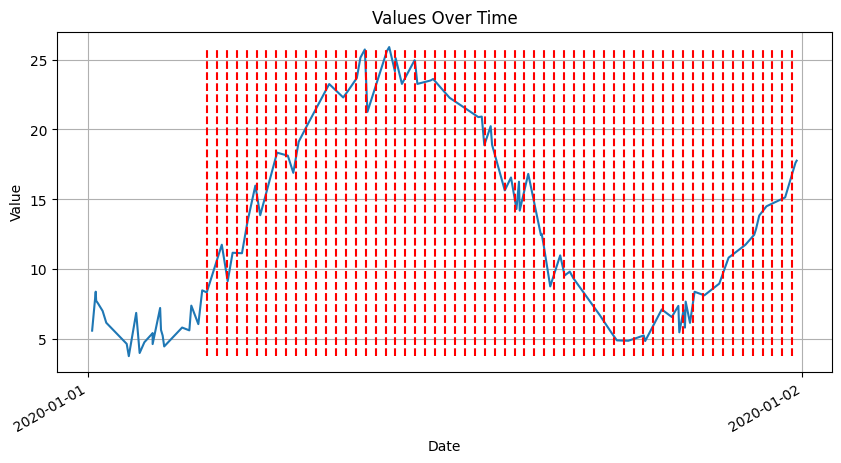

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

from examples.time_series_stats.hypothetical_time_series import SeriesStatistics


rng = Generator(SFC64(123453))
start_time = datetime(2020, 1, 1, 0, 0, 0)
end_time = datetime(2020, 1, 2, 0, 0, 0)
unix_times_ms, tokens = SimulateData.generate_sine_wave_with_noise(
    start=start_time,
    end=end_time,
    n=100,
    amplitude=10.0,
    shift=15.0,
    noise_std=0.1,
    rng=rng,
    period_ms=(17 * 60 * 60 * 1000),  # in milliseconds
)

# Convert Unix timestamps in milliseconds to datetime objects
measurement_times = [datetime.fromtimestamp(t / 1000) for t in unix_times_ms]

# Calculate rolling window intervals between start and end times.
window_starts_and_ends = SeriesStatistics.rolling_window_starts_and_ends(
    start_time, end_time, window_size=timedelta(hours=4), step_size=timedelta(minutes=20)
)
window_ends = tuple(zip(*window_starts_and_ends))[1]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(measurement_times, tokens)  # Plot the tokens against times
# Plot window ends as tick marks.
plt.vlines(window_ends, ymin=min(tokens), ymax=max(tokens), colors='r', linestyles='dashed')

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to be at every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date display
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

plt.title('tokens Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


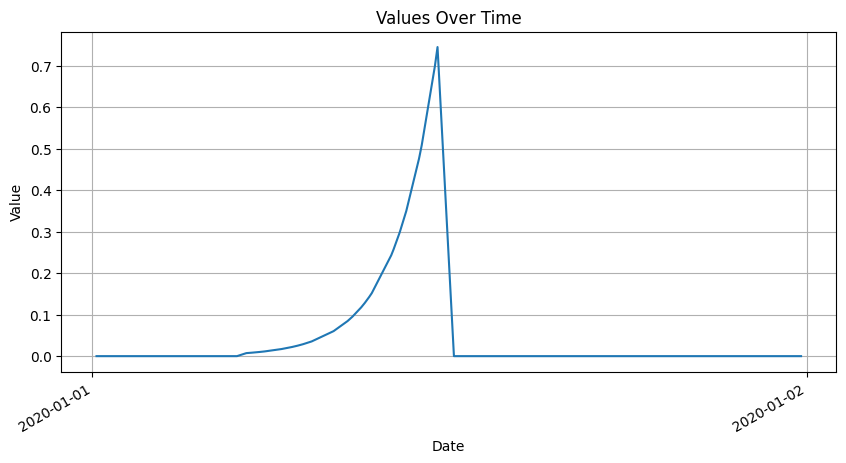

In [4]:
# Plot example window weights

start_of_window = datetime(2020, 1, 1, 5, 0, 10)
end_of_window = datetime(2020, 1, 1, 12, 0, 30)
DECAY_PARAMETER = 0.0002

times_in_window, weights = SeriesStatistics.exponentially_decaying_weighting_in_time_window(
    time_points=measurement_times,
    start_of_window=start_of_window,
    end_of_window=end_of_window,
    decay_parameter=DECAY_PARAMETER,
)
# Assign a weight of zero outside the window.
all_weights = np.zeros(len(measurement_times))
for t, w in zip(times_in_window, weights):
    all_weights[measurement_times.index(t)] = w


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(measurement_times, all_weights)  # Plot the tokens against times

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to be at every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date display
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

plt.title('tokens Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


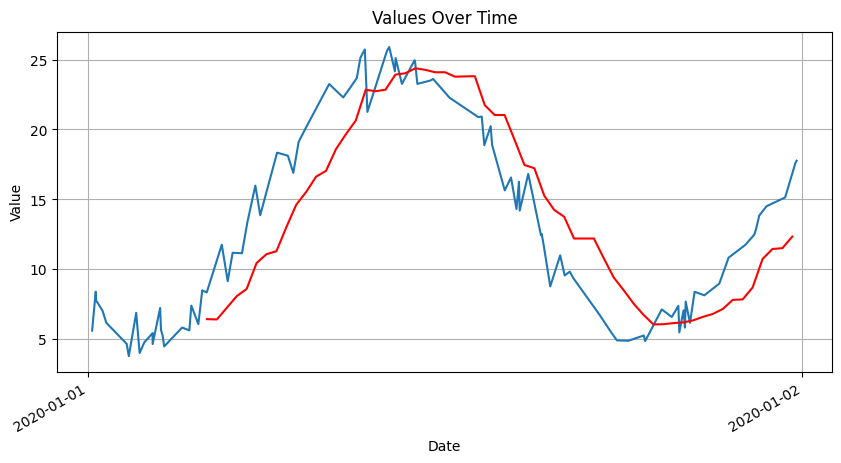

In [5]:
window_ends, ema = SeriesStatistics.exponential_moving_average(
    measurement_times=measurement_times,
    tokens=tokens,
    start_time=start_time,
    end_time=end_time,
    decay_parameter=DECAY_PARAMETER,
)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(measurement_times, tokens)  # Plot the tokens against times
plt.plot(window_ends, ema, '-r')  # Plot the tokens against times

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to be at every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date display
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

plt.title('tokens Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()
